# **Python for data science and data analysis from scratch**

# NLP Natural Language Processing



Librerías que usaremos en esta sesión:

**numpy**

**pandas**

**matplotlib**

**scikit-learn**

---


**re**

Módulo nativo de Python que contiene operaciones de para 

---


**nltk**

Es un grupo de librerías para procesamiento de lenguaje natural en idioma inglés

En esta sesión usaremos la librería de **scikit-learn** para hacer análisis de sentimientos usando datos obtenidos de Twitter.
El análisis de sentimientos es una de las aplicaciones de procesamiento de lenguaje más populares.
En la industria es usado para analizar encuestas, datos de redes sociales, críticas a productos, lugares, etc. La idea es analizar y entender las reacciones de las personas por un objeto en específico y tomar acciones al respecto.
La idea clave en este análisis es usar técnicas de análisis, NLP, aprendizaje automático y reglas lingüísticas para extraer información importante del texto.
Para asignar una polaridad al texto se usa un 0 cuando el sentimiento es neutral, valores menores a 0 cuando es negativo y mayores a 0 cuando es positivo.


In [0]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Definición del problema

Con tweets que hablan de aerolíneas, vamos a predecir si contienen comentarios positivos, negativos o neutrales acerca de la aerolínea.


In [0]:
data_source_url = "https://saturdays-ai.s3-us-west-2.amazonaws.com/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [0]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Análisis de los datos

Primero vamos a visualizar nuestro dataset para ver si encontramos alguna tendencia.

Vamos a crear una gráfica, para ver el porcentaje de tweets que hablan de cada aerolínea.


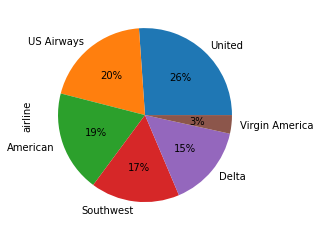

In [0]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

Ahora, vamos a ver la distribución de los sentimientos en los tweets


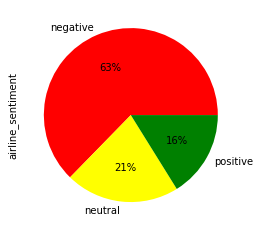

In [0]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

También podemos visualizar la distribución de sentimientos para cada aerolínea


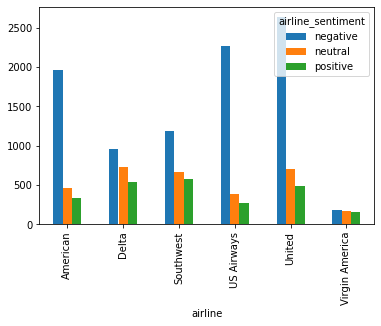

In [0]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

## Expresiones regulares Regex

Son una secuencia de caracteres que conforma un patrón de búsqueda.

<table>
  <tr>
    <th>Carácter</th>
    <th>Significado</th>
  </tr>
  <tr>
    <td>.</td>
    <td>Cualquier carácter</td>
  </tr>
  <tr>
    <td>\d</td>
    <td>Representa un dígito del 0 al 9.</td>
  </tr>
  <tr>
    <td>\w</td>
    <td>Representa cualquier carácter alfanumérico.</td>
  </tr>
  <tr>
    <td>\s</td>
    <td>Representa un espacio en blanco.</td>
  </tr>
  <tr>
    <td>\D</td>
    <td>Representa cualquier carácter que no sea un dígito del 0 al 9.</td>
  </tr>
  <tr>
    <td>\W</td>
    <td>Representa cualquier carácter no alfanumérico.</td>
  </tr>
  <tr>
    <td>\S</td>
    <td>Representa cualquier carácter que no sea un espacio en blanco.</td>
  </tr>
  <tr>
    <td>[ ]</td>
    <td>Representa cualquier grupo de caractéres que estén dentro de los corchetes.</td>
  </tr>
  <tr>
    <td>{n}</td>
    <td>Las llaves con un número representan la búsqueda n número de veces.</td>
  </tr>
  <tr>
    <td>+</td>
    <td>Se utiliza para encontrar una cadena que se encuentre repetida una o más veces.</td>
  </tr>
  <tr>
    <td>*</td>
    <td>Se utiliza para encontrar una cadena que se encuentre repetida cero o más veces.</td>
  </tr>
  </tr>
  <tr>
    <td>^</td>
    <td>Representa la búsqueda al inicio de la cadena, dentro de corchetes es negación.</td>
  </tr>
  <tr>
    <td>$</td>
    <td>Representa la búsqueda al final de la cadena.</td>
  </tr>
  <tr>
    <td>|</td>
    <td>Sirve para indicar una de varias opciones.</td>
  </tr>
</table>




In [0]:
import re

line = '01/04/2020, 444-222-3333 es un teléfono, 01/04/2020 es una fecha, 555-333-9999';

matchObj = re.search( r'[0-9]{3}-\d{3}-\d{4}', line)

if matchObj:
   print("match: ", matchObj.group())
else:
  print('No match')

match:  444-222-3333


**Ejercicio**

1. Crear una expresión regular que busque correos electrónicos
2. Crear una expresión regular que busque fechas con el formato dd/mm/aaaa

In [0]:
import re
line = 'Este correo no es valido: #$()!ai@saturdays.com, este es un correo valido: tania@saturdays.ai'

matchObj = matchObj = re.search( r'\w@\w+\.\w+', line)

if matchObj:
   print("match: ", matchObj.group())
else:
  print('No match')

match:  i@saturdays.com


In [0]:
import re
line = 'Esta es una fecha valida: 01/10/2020, esta no lo es: 90/10/2020, esta tampoco: 10-01-2020'

matchObj = re.search( r'(((0[1-9]|[12][0-9]|3[01])[- /.](0[13578]|1[02])|(0[1-9]|[12][0-9]|30)[- /.](0[469]|11)|(0[1-9]|1\d|2[0-8])[- /.]02)[- /.]\d{4}|29[- /.]02[- /.](\d{2}(0[48]|[2468][048]|[13579][26])|([02468][048]|[1359][26])00))', line)

if matchObj:
   print("match: ", matchObj.group())
else:
  print('No match')

match:  01/10/2020


## Limpieza de los datos

Para este ejercicio vamos a tomar el texto del tweet, en la columna 10 y las etiquetas, en la columna 1.

In [0]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [0]:
processed_features = []

for sentence in range(0, len(features)):
    #Eliminar todos los caracteres especiales
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Eliminar las letras solas
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Eliminar las letras solas al inicio de la oracion
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Sustituir multiples espacios con uno solo
    processed_feature = re.sub(r'\s+', ' ', processed_feature)

    # Eliminar prejijo 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Convertir a minusculas
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


## Stop words

Son palabras que tienen poco o ningún significado. Usualmente terminan apareciendo muchas veces en el texto si hacemos una frecuencia de las palabras. Palabras como un, una, el, la, etc, son consideradas stopwords. 

La librería de **nltk** tiene una lista de stopwords en inglés, pero también podemos agregar palabras a dominios específicos si lo necesitamos.

## Representar texto en formato numérico

Los algoritmos estadísticos de aprendizaje automático usan matemáticas para entrenar a los modelos, sin embargo estas operaciones solo pueden realizarse con números. 
Para hacer que los algoritmos estadísticos pueda trabajar con texto tenemos que convertirlo a números. Uno de éstos métodos es TF-IDF

## TF-IDF

**Factor TF:** Term Frequency: 

Frecuencia de Aparición de un Término.
El TF mide la frecuencia de uso de un término específico en una página o documento. Cuanto más largo sea un contenido mayor serán las veces que se use una keyword dentro del mismo. La frecuencia de uso de una palabra clave se calculará dependiendo de la extensión de un contenido.

    TF = (Número de veces que la palabra clave aparece en el documento) / (Número total de palabras en el documento)

**Factor IDF:** Inverse Document Frequency:

Frecuencia Inversa de documento.
Mide la importancia de un término específico por su relevancia dentro del documento. Para este cálculo se necesita reducir el uso de términos poco importantes e  incrementar otros:

    IDF = (Número total de documentos) / (Número total de términos en el documento)

    

La librería **Scikit-learn** contiene el algoritmo de **TfidfVectorizer**. 

El argumento de **max_features** indica que solo usara las 2500 palabras más frecuentes, **max_df** especifica que solo se utilizarán las palabras que aparezcan en máximo el 80% de los documentos (las palabras que aparecen en todos los documentos son demasiado comunes, por lo que no son muy útiles para la clasificación), **min_df** indica que las palabras deben aparecer en al menos el 7% de los documentos.

In [0]:
nltk.download('stopwords')

from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(max_features=2500, min_df=0.1, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

## Dividir dataset

In [0]:
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

## Crear clasificador

Random Forest es un tipo de Ensamble en Machine Learning en donde combinaremos diversos árboles de decisión y la salida de cada uno se contará como "un voto" y la opción más votada será la respuesta del **Bosque Aleatorio**.

Random Forest, al igual que el árbol de decisión, es un modelo de aprendizaje supervisado para clasificación (aunque también puede usarse para problemas de regresión).

Es llamado aleatorio, porque la selección de las k de características para cada árbol, como la cantidad de muestras que usaremos para entrenar cada árbol es aleatoria.


El módulo de sklearn.ensemble contiene la clase **RandomForestClassifier** que usaremos para entrenar nuestro algoritmo. 

Al igual que en algoritmos anteriores usaremos el método **fit()** usando las etiquetas y atributos.

In [0]:
text_classifier = RandomForestClassifier(n_estimators=200)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Realizar predicciones y evaluar el modelo


Una vez que el modelo ha sido entrenado, el siguiente paso es hacer predicciones en el modelo. Para hacerlo, llamamos el método predict() con nuestro dataset de pruebas.

In [0]:
predictions = text_classifier.predict(X_test)

predictions

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

Para evaluar nuestro modelo tenemos los métodos de classification_report y accuracy_score.

In [0]:
print(y_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
              precision    recall  f1-score   support

    negative       0.68      0.95      0.79      1870
     neutral       0.54      0.13      0.21       614
    positive       0.53      0.21      0.30       444

    accuracy                           0.67      2928
   macro avg       0.58      0.43      0.43      2928
weighted avg       0.63      0.67      0.60      2928

0.6656420765027322
